## ANALYZING FIFA19 DATASET

Detailed attributes for every player registered in the latest edition of FIFA 19 database.
Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

Acknowledgements: Data scraped from https://sofifa.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv("fifa19.csv")

display(players.shape)
players.head(10)

(18207, 89)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [3]:
players.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Now we'll create a new dataset including only the columns that are important.

In [4]:
players1 = players[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage','Preferred Foot', 'International Reputation', 'Weak Foot','Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number','Height', 'Weight', 'Release Clause']].copy()

display(players1.shape)
players1.head()

(18207, 20)

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,5'9,150lbs,€228.1M
3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,5'11,154lbs,€196.4M


Now it looks much better with 20 columns instead of the initial 89. Now let's create another dataframe which will include mostly the detailed characteristics columns.

In [5]:
players2 = players[['ID', 'Name','Overall','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].copy()

display(players2.shape)
players2.head()

(18207, 37)

,ID,Name,Overall,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,94,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,94,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,92,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,91,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,91,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# INVESTIGATING ALL THE COLUMNS AND TYPES OF VARIABLES

As discussed from now on we'll be dealing with 'players1' dataset.

In [6]:
display(players1.shape)
players1.head()

(18207, 20)

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,5'9,150lbs,€228.1M
3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,5'11,154lbs,€196.4M


In [7]:
players1.describe(include='all')

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,18207.000000,18207,18207.000000,18207,18207.000000,17966,18207,18207,18159,18159.000000,18159.000000,18159.000000,18159,18159,18159,18147,18147.000000,18159,18159,16643
unique,NaN,17194,NaN,164,NaN,651,217,144,2,NaN,NaN,NaN,9,10,2,27,NaN,21,57,1244
top,NaN,J. Rodríguez,NaN,England,NaN,Borussia Dortmund,€1.1M,€1K,Right,NaN,NaN,NaN,Medium/ Medium,Normal,No,ST,NaN,6'0,165lbs,€1.1M
freq,NaN,11,NaN,1662,NaN,33,431,4900,13948,NaN,NaN,NaN,9810,10595,16505,2152,NaN,2881,1483,557
mean,214298.338606,NaN,25.122206,NaN,66.238699,NaN,NaN,NaN,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,NaN,19.546096,NaN,NaN,NaN
std,29965.244204,NaN,4.669943,NaN,6.908930,NaN,NaN,NaN,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,NaN,15.947765,NaN,NaN,NaN
min,16.000000,NaN,16.000000,NaN,46.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,200315.500000,NaN,21.000000,NaN,62.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,221759.000000,NaN,25.000000,NaN,66.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN
75%,236529.500000,NaN,28.000000,NaN,71.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN


In [8]:
#we can see that many columns only have 18159 values instead of 18207. so there are 48 players that for some reason do not have this info.

nulls = players1[players1['Weak Foot'].isnull()]
nulls['Overall']

13236    62
13237    62
13238    62
13239    62
13240    62
13241    62
13242    62
13243    62
13244    62
13245    62
13246    62
13247    62
13248    62
13249    62
13250    62
13251    62
13252    62
13253    62
13254    62
13255    62
13256    62
13257    62
13258    62
13259    62
13260    62
13261    62
13262    62
13263    62
13264    62
13265    62
13266    62
13267    62
13268    62
13269    62
13270    62
13271    62
13272    62
13273    62
13274    62
13275    62
13276    62
13277    62
13278    62
13279    62
13280    62
13281    62
13282    62
13283    62
Name: Overall, dtype: int64

We can see that these 48 players have the same rating of 62. It looks like smth is wrong, or even if there is such a coincidence we can easily drop these rows since they do not give us any proper additional insight. 

In [9]:
players1 = players1[players1['Weak Foot'].notnull()]
players1.describe(include='all')

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,18159.000000,18159,18159.000000,18159,18159.000000,17918,18159,18159,18159,18159.000000,18159.000000,18159.000000,18159,18159,18159,18147,18147.000000,18159,18159,16643
unique,NaN,17150,NaN,164,NaN,651,217,144,2,NaN,NaN,NaN,9,10,2,27,NaN,21,57,1244
top,NaN,J. Rodríguez,NaN,England,NaN,Borussia Dortmund,€1.1M,€1K,Right,NaN,NaN,NaN,Medium/ Medium,Normal,No,ST,NaN,6'0,165lbs,€1.1M
freq,NaN,11,NaN,1657,NaN,33,431,4873,13948,NaN,NaN,NaN,9810,10595,16505,2152,NaN,2881,1483,557
mean,214279.590286,NaN,25.122529,NaN,66.249904,NaN,NaN,NaN,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,NaN,19.546096,NaN,NaN,NaN
std,29968.461880,NaN,4.670568,NaN,6.914613,NaN,NaN,NaN,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,NaN,15.947765,NaN,NaN,NaN
min,16.000000,NaN,16.000000,NaN,46.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,200300.000000,NaN,21.000000,NaN,62.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,221743.000000,NaN,25.000000,NaN,66.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN
75%,236508.500000,NaN,28.000000,NaN,71.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN


After doing this we can see above that we also have 241 players (18.159-17.918) that have the club value missing, but that's simply because they are free agents and do not play for any club at the moment, but they do exist in FIFA simply because they are part of some international team. So we won't touch them. 

## Now let's determine all types of variables and their respective scales of measurements


In [10]:
df_new = pd.DataFrame({'Column Name':['ID', 'Name', 'Age', 'Nationality','Overall','Club','Value','Wage','Preferred Foot','International Reputation','Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Height', 'Weight', 'Release Clause'], 
                       'Variable Type':['quality','quality','quantity','quality','quantity','quality','quantity','quantity','quality','quantity', 'quantity', 'quantity','quality*','quality','quality','quality', 'quality', 'quantity', 'quantity','quantity'], 
                       'Scale of Measurement':['nominal(unique values)','nominal(unique values)','ratio(discrete)','nominal','ratio(discrete)','nominal','ratio(discrete)','ratio(discrete)','nominal','ordinal','ordinal','ordinal','nominal*','nominal','nominal','nominal', 'nominal','ratio(continuous)','ratio(continuous)','ratio(discrete)']}) 
df_new.head(20)

,Column Name,Variable Type,Scale of Measurement
0,ID,quality,nominal(unique values)
1,Name,quality,nominal(unique values)
2,Age,quantity,ratio(discrete)
3,Nationality,quality,nominal
4,Overall,quantity,ratio(discrete)
5,Club,quality,nominal
6,Value,quantity,ratio(discrete)
7,Wage,quantity,ratio(discrete)
8,Preferred Foot,quality,nominal
9,International Reputation,quantity,ordinal


We'll visualize this bunch of 3 in the first place
- Age (histogram)
- Overall Rating (histogram)
- Nationalities (bar plot)

This 3 are ordinal so we can do bar plots for all 3.

- International Reputation 
- Weak Foot
- Skill Moves 

This 5 are nominal so we can do a bar plot or pie chart.

- Preferred Foot 
- Body Type 
- Real Face
- Position
- Jersey Number

We need to convert this 5 columns into numeric

- Value
- Wage
- Release Clause
- Height
- Weight

In [11]:
# To visualize frequency distributions for nominal and ordinal variables we can use Bar plots and Pie charts. 
# series.plot.bar() or _series.plot.pie()

# To visualize frequency distributions for variables measured on an interval or ratio scale (discrete or continuous) we can use a histogram.
# series.plot.hist()


# For comparing frequency distributions for nominal and ordinal variables (grouped bar plots). 
# import seaborn as sns
# sns.countplot(x='series1', hue='series2', data=some_dataframe)

# For comparing frequency distributions for variables measured on interval or ratio scale we can use (Step Type Histogram or Kernel Density Plots). 
# series1.plot.hist(histtype='step'), series2.plot.hist(histtype='step')
# series1.plot.kde(), series2.plot.kde()


## Age, Overall, Nationality Distributions

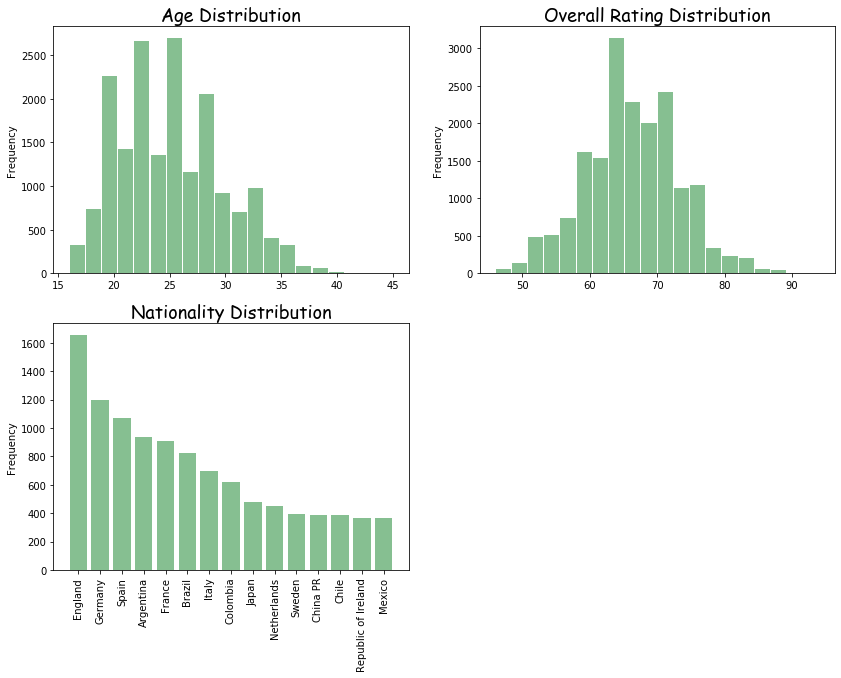

In [121]:
#now the visualization

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(players1["Age"], color='#86bf91', rwidth=0.93, bins=20)
ax1.set_ylabel('Frequency')
ax1.set_title ('Age Distribution', fontname = 'Comic Sans MS', fontsize = 18)

ax2.hist(players1["Overall"], color='#86bf91', rwidth=0.93, bins=20)
ax2.set_ylabel('Frequency')
ax2.set_title ('Overall Rating Distribution', fontname = 'Comic Sans MS', fontsize = 18)

#for the third we would need to generate a new dataframe real quick
players_nations = players1["Nationality"].value_counts().head(15).to_frame()
players_nations.reset_index(level=0, inplace=True)
players_nations.columns = ["Nationality", "Frequency"]

ax3.bar(players_nations["Nationality"], players_nations["Frequency"], color='#86bf91')
ax3.set_xticklabels(players_nations["Nationality"], rotation=90)
ax3.set_ylabel("Frequency")
ax3.set_title('Nationality Distribution', fontname = 'Comic Sans MS', fontsize = 18)
plt.show()

__Age__
We can see that most of the players are between 20 and 28 years old. 

__Overall__
The majority of overall ratings fall between 60 and 75. 

__Nationality__
Out of 18,207 players England has the most players represented in the game, about 1600. That is mostly due to the fact that there are also econd and third leagues of english football represented in the game where the majority of players are locals. The difference between others is not that significant as between the first and the second country.

## International Reputiation, Weak Foot, Skill Moves distributions

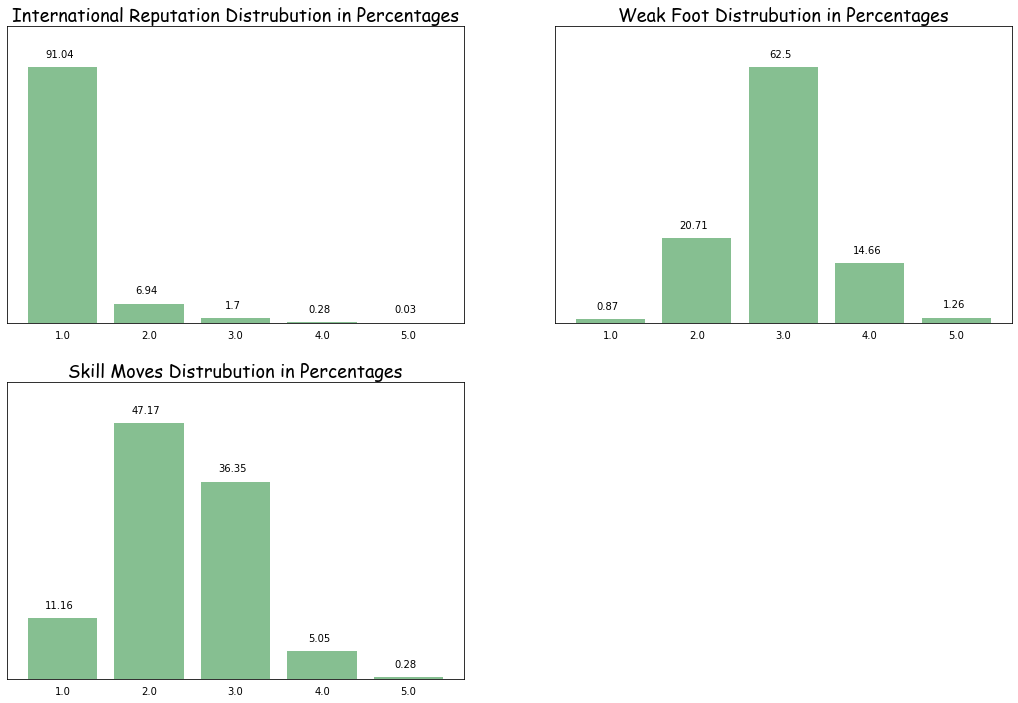

In [13]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

###FIRST

#Generating the frequency distribution dataframe with percentages
players_reputations = players1["International Reputation"].value_counts(normalize=True).to_frame()
players_reputations.reset_index(level=0, inplace=True)
players_reputations.columns = ["Reputation", "Frequency"]
players_reputations['Frequency'] = players_reputations['Frequency']*100
players_reputations.Frequency = players_reputations.Frequency.round(2)

#Adding the subplot
ax1.bar(players_reputations["Reputation"], players_reputations["Frequency"], color='#86bf91')
ax1.set_ylabel("Percentage")
ax1.set_title('International Reputation Distrubution in Percentages', fontname = 'Comic Sans MS', fontsize = 18)

#Adding annotations
x = players_reputations["Reputation"]
y = players_reputations["Frequency"]

#Define upper y limit leaving space for the text above the bars.
up = max(y) * .04
ax1.set_ylim(0, max(y) + 4 * up)

#Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax1.text(xi - len(l) * .04, yi + up, l)
ax1.set_xticks(x)
ax1.set_xticklabels(players_reputations["Reputation"])

#removing extra ink
ax1.tick_params(bottom = False, left = False)
ax1.get_yaxis().set_visible(False)



###SECOND

#Generating the frequency distribution dataframe with percentages
players_weak_foot = players1["Weak Foot"].value_counts(normalize=True).to_frame()
players_weak_foot.reset_index(level=0, inplace=True)
players_weak_foot.columns = ["Weak Foot", "Frequency"]
players_weak_foot['Frequency'] = players_weak_foot['Frequency']*100
players_weak_foot.Frequency = players_weak_foot.Frequency.round(2)

#Adding the subplot
ax2.bar(players_weak_foot["Weak Foot"], players_weak_foot["Frequency"], color='#86bf91')
ax2.set_ylabel("Percentage")
ax2.set_title('Weak Foot Distrubution in Percentages', fontname = 'Comic Sans MS', fontsize = 18)

#Adding annotations
x = players_weak_foot["Weak Foot"]
y = players_weak_foot["Frequency"]

#Define upper y limit leaving space for the text above the bars.
up = max(y) * .04
ax2.set_ylim(0, max(y) + 4 * up)

#Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax2.text(xi - len(l) * .04, yi + up, l)
ax2.set_xticks(x)
ax2.set_xticklabels(players_weak_foot["Weak Foot"])

#removing extra ink
ax2.tick_params(bottom = False, left = False)
ax2.get_yaxis().set_visible(False)



##THIRD

#Generating the frequency distribution dataframe with percentages
players_skill_moves = players1["Skill Moves"].value_counts(normalize=True).to_frame()
players_skill_moves.reset_index(level=0, inplace=True)
players_skill_moves.columns = ["Skill Moves", "Frequency"]
players_skill_moves['Frequency'] = players_skill_moves['Frequency']*100
players_skill_moves.Frequency = players_skill_moves.Frequency.round(2)

#Adding the subplot
ax3.bar(players_skill_moves["Skill Moves"], players_skill_moves["Frequency"], color='#86bf91')
ax3.set_ylabel("Percentage")
ax3.set_title('Skill Moves Distrubution in Percentages', fontname = 'Comic Sans MS', fontsize = 18)

#Adding annotations
x = players_skill_moves["Skill Moves"]
y = players_skill_moves["Frequency"]

#Define upper y limit leaving space for the text above the bars.
up = max(y) * .04
ax3.set_ylim(0, max(y) + 4 * up)

#Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax3.text(xi - len(l) * .04, yi + up, l)
ax3.set_xticks(x)
ax3.set_xticklabels(players_skill_moves["Skill Moves"])

#removing extra ink
ax3.tick_params(bottom = False, left = False)
ax3.get_yaxis().set_visible(False)

We can see that all these three are nominal variables, just regular ratings.The only issue with the visualizations above that the frequency distributions is super uneven, and as we can see for example several cases with percentages less than 1. So it would make sense to just have a look at value counts in absolute numbers as well.

In [14]:
display(players1["International Reputation"].value_counts())
display(players1["Weak Foot"].value_counts())
display(players1["Skill Moves"].value_counts())

display(players1[players1['International Reputation'] == 5.0])
display(players1[players1['International Reputation'] == 4.0])
display(players1[players1['Skill Moves'] == 5.0])

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

3.0    11349
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,5'9,150lbs,€228.1M
7,176580,L. Suárez,31,Uruguay,91,FC Barcelona,€80M,€455K,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,6'0,190lbs,€164M
22,167495,M. Neuer,32,Germany,89,FC Bayern München,€38M,€130K,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,6'4,203lbs,€62.7M
109,41236,Z. Ibrahimović,36,Sweden,85,LA Galaxy,€14M,€15K,Right,5.0,4.0,5.0,Medium/ Low,Normal,Yes,RS,9.0,6'5,209lbs,€21M


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,5'11,154lbs,€196.4M
5,183277,E. Hazard,27,Belgium,91,Chelsea,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,5'8,163lbs,€172.1M
6,177003,L. Modrić,32,Croatia,91,Real Madrid,€67M,€420K,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,5'8,146lbs,€137.4M
8,155862,Sergio Ramos,32,Spain,91,Real Madrid,€51M,€380K,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,6'0,181lbs,€104.6M
10,188545,R. Lewandowski,29,Poland,90,FC Bayern München,€77M,€205K,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,ST,9.0,6'0,176lbs,€127.1M
11,182521,T. Kroos,28,Germany,90,Real Madrid,€76.5M,€355K,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,6'0,168lbs,€156.8M
13,168542,David Silva,32,Spain,90,Manchester City,€60M,€285K,Left,4.0,2.0,4.0,High/ Medium,Normal,Yes,LCM,21.0,5'8,148lbs,€111M
17,194765,A. Griezmann,27,France,89,Atlético Madrid,€78M,€145K,Left,4.0,3.0,4.0,High/ High,Lean,Yes,CAM,7.0,5'9,161lbs,€165.8M
19,192119,T. Courtois,26,Belgium,89,Real Madrid,€53.5M,€240K,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,6'6,212lbs,€113.7M


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,5'9,150lbs,€228.1M
25,231747,K. Mbappé,19,France,88,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,High/ Medium,Lean,Yes,RM,10.0,5'10,161lbs,€166.1M
32,189242,Coutinho,26,Brazil,88,FC Barcelona,€69.5M,€340K,Right,3.0,4.0,5.0,High/ High,Normal,Yes,LW,7.0,5'8,150lbs,€147.7M
35,176676,Marcelo,30,Brazil,88,Real Madrid,€43M,€285K,Left,4.0,4.0,5.0,High/ Low,Normal,Yes,LB,12.0,5'9,176lbs,€88.2M
45,195864,P. Pogba,25,France,87,Manchester United,€64M,€210K,Right,4.0,4.0,5.0,High/ Low,Normal,Yes,RDM,6.0,6'4,185lbs,€123.2M
65,190483,Douglas Costa,27,Brazil,86,Juventus,€46.5M,€175K,Left,3.0,3.0,5.0,High/ Medium,Normal,Yes,LM,11.0,5'8,154lbs,€76.7M
67,189509,Thiago,27,Spain,86,FC Bayern München,€45.5M,€130K,Right,3.0,3.0,5.0,Medium/ Medium,Normal,Yes,CM,19.0,5'9,154lbs,€75.1M
84,204485,R. Mahrez,27,Algeria,85,Manchester City,€40.5M,€205K,Left,3.0,4.0,5.0,Medium/ Medium,Lean,Yes,RW,26.0,5'10,148lbs,€74.9M
109,41236,Z. Ibrahimović,36,Sweden,85,LA Galaxy,€14M,€15K,Right,5.0,4.0,5.0,Medium/ Low,Normal,Yes,RS,9.0,6'5,209lbs,€21M


__International Reputation__
We can see that there are only 6 players with 5 star reputations and only 51 with 4 star. By looking at the player rows who has them we can see that it doesn't depend only on rating, but it's some kind of representation of the player's fame/reputation. For example Aubameyang with quite high rating is not on the list, but Mascherano, Rooney and Hulk, Cassilas are and have 4 start international reputation. These are players that are relatively old and used to be good in previous Fifas, so even if they might have a low rating at the moment just for the sake of their current performance, EA decided to add this new "reputation" thing that will somehow compensate their current rating. E.G. Rooney that has a rating of 80 will perform better than another random player with that rating, simply because of his reputation. That's what I would assume. Anyway, EA never talked about it and never explained properly what does it stand for, so we could only assume. Looking at the value counts we can notice the uneven distribution right away, with 91% of the players in the game having the lowest reputation of 1.

__Weak Foot__
This one has a relatively more normal distribution. Majority of the players about 62% have the average rating of 3. The number of players who has 2 or 4 is not super different. And the same for the number of players that has 1 or 5 star weak foot, this percentage is about 1 in both cases. In absolute numbers, only about 158 players have 5 star weak foot. So, to sum up, in FIFA, it's rare to find someone who is super good or super bad in this characteristic. About 97% of players have a rating of between 2-4 stars.

__Skill Moves__
We can see that only 51 players (0.2%) in total have 5 star skill moves, which we could consider super rare. Majority (about 83% of players) have 2 or 3 stars ratings. 

## Preferred Foot, Body Type, Real Face, Position, Jersey Number

In [15]:
#Let's do the value counts for all of them and then jump into visualizations

display(players1['Preferred Foot'].value_counts())
display(players1['Body Type'].value_counts())
display(players1['Real Face'].value_counts())
display(players1['Position'].value_counts())
display(players1['Jersey Number'].value_counts().head(23))

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

Normal                 10595
Lean                    6417
Stocky                  1140
C. Ronaldo                 1
Shaqiri                    1
Neymar                     1
Akinfenwa                  1
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Name: Body Type, dtype: int64

No     16505
Yes     1654
Name: Real Face, dtype: int64

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

8.0     612
7.0     604
10.0    593
11.0    590
6.0     586
5.0     579
9.0     577
4.0     573
20.0    568
1.0     566
17.0    554
3.0     547
23.0    546
19.0    545
18.0    545
14.0    542
21.0    536
22.0    531
2.0     519
16.0    517
15.0    501
24.0    425
27.0    423
Name: Jersey Number, dtype: int64

We'll put it in this way

- Preferred Foot (pie chart)

- Body Type (pie chart) - We'll just exclude the 7 unique body types as exclusions to have a better well shaped pie chart

- Real Face (pie chart)

Regarding the next 2 columns

- Position 

- Jersey Number - We can see from the value counts above that there is not much isnight that can be drown from this column, the distribution of jersey numbers is quite even, and ranges equally from 1 to 23. So there is no need to visualize this.

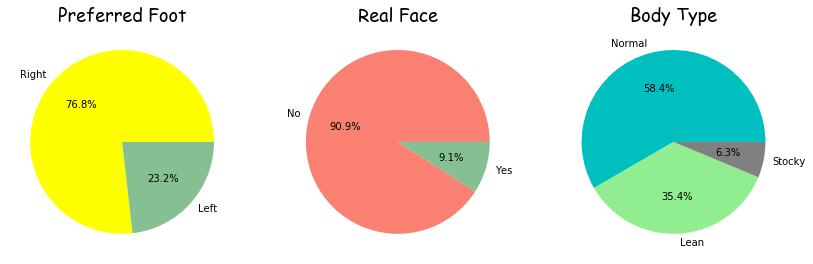

Body Type*: There were 7 out of 18159 players that had unique body type that we excluded from the pie chart. Those were Messi, Ronaldo, Neymar, Shaqiri, Curtouis and Akinfenwa and one no name.


In [16]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

###FIRST

#Generating the frequency distribution dataframe with percentages
players_preferredfoot = players1["Preferred Foot"].value_counts(normalize=True).to_frame()
players_preferredfoot.reset_index(level=0, inplace=True)
players_preferredfoot.columns = ["Preferred Foot", "Frequency"]
players_preferredfoot['Frequency'] = players_preferredfoot['Frequency']*100
players_preferredfoot.Frequency = players_preferredfoot.Frequency.round(2)

labels = players_preferredfoot["Preferred Foot"]
colors = ['yellow','#86bf91']

#Adding the subplot
ax1.pie(players_preferredfoot["Frequency"], labels=labels, colors = colors, autopct='%1.1f%%')
ax1.set_title("Preferred Foot", fontname = 'Comic Sans MS', fontsize = 18)

###SECOND

#Generating the frequency distribution dataframe with percentages
players_real_face = players1["Real Face"].value_counts(normalize=True).to_frame()
players_real_face.reset_index(level=0, inplace=True)
players_real_face.columns = ["Real Face", "Frequency"]
players_real_face['Frequency'] = players_real_face['Frequency']*100
players_real_face.Frequency = players_real_face.Frequency.round(2)

labels = players_real_face["Real Face"]
colors = ['salmon','#86bf91']

#Adding the subplot
ax2.pie(players_real_face["Frequency"], labels=labels, colors = colors, autopct='%1.1f%%')
ax2.set_title("Real Face", fontname = 'Comic Sans MS', fontsize = 18)

###THIRD

#Generating the frequency distribution dataframe with percentages
players_body_type = players1["Body Type"].value_counts(normalize=True).to_frame()
players_body_type.reset_index(level=0, inplace=True)
players_body_type.columns = ["Body Type", "Frequency"]
players_body_type['Frequency'] = players_body_type['Frequency']*100
players_body_type.Frequency = players_body_type.Frequency.round(2)
players_body_type = players_body_type[players_body_type["Frequency"] > 0.01]

labels = players_body_type["Body Type"]
colors = ['c','lightgreen', 'grey']

#Adding the subplot
ax3.pie(players_body_type["Frequency"], labels=labels, colors = colors, autopct='%1.1f%%')
ax3.set_title("Body Type", fontname = 'Comic Sans MS', fontsize = 18)
plt.show()
print('Body Type*: There were 7 out of 18159 players that had unique body type that we excluded from the pie chart. Those were Messi, Ronaldo, Neymar, Shaqiri, Curtouis and Akinfenwa and one no name.')

In [17]:
players_position= players1["Position"].value_counts().to_frame()
players_position.reset_index(level=0, inplace=True)
players_position.columns = ["Position", "Frequency"]


def detect_position(Position):
    if Position == 'GK':
        return 'Goalkeeper'
    elif Position == 'CB' or Position == 'LB' or Position == "RB" or Position == "RWB" or Position == "LWB" or Position == "RCB" or Position == "LCB":
        return 'Defender'
    elif Position == 'CM' or Position == 'CAM' or Position == "CDM" or Position == "RM" or Position == "LM" or  Position == "LDM" or Position == "RDM" or Position == "LCM" or Position == "RCM" or Position == "LAM" or Position == "RAM":
        return 'Midfielder'
    elif Position == 'ST' or Position == 'LW' or Position == "RW" or Position == "LF" or Position == "RF" or Position == "CF" or Position == "LS" or Position == "RS":
        return 'Attacker'
    else:
        pass
    
players_position['Position Category'] = players_position.apply(lambda x: detect_position(x['Position']), axis=1)

players_position = players_position.groupby("Position Category").agg({'Frequency':'sum'})
players_position.reset_index(level=0, inplace=True)
players_position.columns = ['Position Category', 'Frequency']
players_position['Percentages'] = (players_position['Frequency']/players_position['Frequency'].sum())*100

display(players_position.head())

,Position Category,Frequency,Percentages
0,Attacker,3418,18.835069
1,Defender,5866,32.324902
2,Goalkeeper,2025,11.158869
3,Midfielder,6838,37.681159


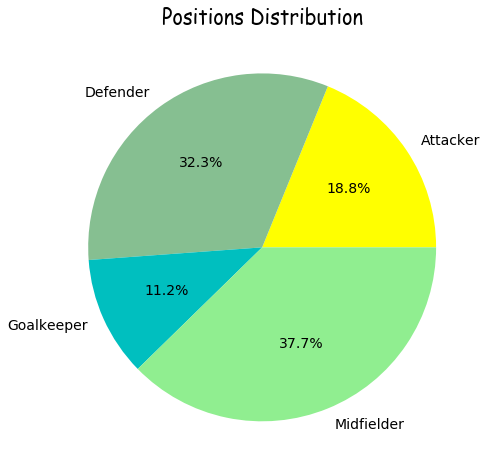

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)

###FIRST

#Generating the frequency distribution dataframe with percentages
labels = players_position["Position Category"]
colors = ['yellow','#86bf91','c','lightgreen']

#Adding the subplot
ax1.pie(players_position["Percentages"], labels=labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.set_title("Positions Distribution", fontname = 'Comic Sans MS', fontsize = 20)
plt.show()


## Value, Wage, Release Clause, Height, Weight - Standardization

We need to convert this columns into numeric (floats or integers) and change the column names and do some other operations to make it easier to work with.

In [19]:
display(players1[['Value','Wage','Release Clause', 'Height','Weight']].head(10))
players1[['Value','Wage','Release Clause', 'Height','Weight']].tail(10)

,Value,Wage,Release Clause,Height,Weight
0,€110.5M,€565K,€226.5M,5'7,159lbs
1,€77M,€405K,€127.1M,6'2,183lbs
2,€118.5M,€290K,€228.1M,5'9,150lbs
3,€72M,€260K,€138.6M,6'4,168lbs
4,€102M,€355K,€196.4M,5'11,154lbs
5,€93M,€340K,€172.1M,5'8,163lbs
6,€67M,€420K,€137.4M,5'8,146lbs
7,€80M,€455K,€164M,6'0,190lbs
8,€51M,€380K,€104.6M,6'0,181lbs
9,€68M,€94K,€144.5M,6'2,192lbs


,Value,Wage,Release Clause,Height,Weight
18197,€60K,€1K,€88K,5'10,141lbs
18198,€60K,€1K,€165K,5'11,154lbs
18199,€70K,€1K,€175K,5'6,150lbs
18200,€60K,€1K,€143K,5'9,157lbs
18201,€60K,€1K,€153K,6'1,168lbs
18202,€60K,€1K,€143K,5'9,134lbs
18203,€60K,€1K,€113K,6'3,170lbs
18204,€60K,€1K,€165K,5'8,148lbs
18205,€60K,€1K,€143K,5'10,154lbs
18206,€60K,€1K,€165K,5'10,176lbs


In [20]:
players1[['Value','Wage','Release Clause', 'Height','Weight']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 5 columns):
Value             18159 non-null object
Wage              18159 non-null object
Release Clause    16643 non-null object
Height            18159 non-null object
Weight            18159 non-null object
dtypes: object(5)
memory usage: 851.2+ KB


All the numbers are the same besides "Release Clause". Let's check

In [21]:
players1[players1['Release Clause'].isnull()].head()

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
28,198710,J. Rodríguez,26,Colombia,88,FC Bayern München,€69.5M,€315K,Left,4.0,3.0,4.0,Medium/ Medium,Normal,Yes,LAM,10.0,5'11,172lbs,NaN
38,167664,G. Higuaín,30,Argentina,88,Milan,€57M,€245K,Right,4.0,4.0,3.0,High/ Medium,Normal,Yes,LS,9.0,6'1,196lbs,NaN
91,187961,Paulinho,29,Brazil,85,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,3.0,3.0,3.0,High/ High,Lean,Yes,LDM,9.0,6'0,157lbs,NaN
166,212523,Anderson Talisca,24,Brazil,83,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,2.0,4.0,4.0,High/ Medium,Normal,No,CAM,24.0,6'3,176lbs,NaN
176,207410,M. Kovačić,24,Croatia,83,Chelsea,€35M,€165K,Right,3.0,4.0,4.0,High/ High,Normal,Yes,LCM,17.0,5'9,172lbs,NaN


We can see that there are a lot of players (around 1516 rows) that do not have a release clause, which is totally fine, we won't touch this. 

Now let's tackle the 'money' columns first. Firstly, we'll work with "Value" column.

This column has string values that might end 'M' and 'K' or without anything at all. 

## STANDARDIZING VALUE

In [22]:
import re

players1_k = players1[players1["Value"].str.contains('K')].copy()
players1_k["Value"] = players1_k["Value"].astype(str)
players1_k["Value"]  = players1_k["Value"].str.extract(r"((?<=€)[\d.]+)") 
players1_k["Value"] = players1_k["Value"].astype(float)
players1_k["Value"] = players1_k["Value"]*1000

players1_m = players1[players1["Value"].str.contains('M')].copy()
players1_m["Value"] = players1_m["Value"].astype(str)
players1_m["Value"]  = players1_m["Value"].str.extract(r"((?<=€)[\d.]+)") 
players1_m["Value"] = players1_m["Value"].astype(float)
players1_m["Value"] = players1_m["Value"]*1000000

#There are certain players that have a value of 0 for some reason and do not have neither 'M' nor 'K' at the end.
players1_others = players1[~players1["Value"].str.contains('M|K')].copy()
players1_others["Value"] = players1_others["Value"].astype(str)
players1_others["Value"]  = players1_others["Value"].str.extract(r"((?<=€)[\d.]+)") 
players1_others["Value"] = players1_others["Value"].astype(float)

newbie = pd.concat([players1_m, players1_k, players1_others])

pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.options.display.float_format = '{:,.2f}'.format

newbie[['Value','Wage','Release Clause', 'Height','Weight']].info()
newbie.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18183
Data columns (total 5 columns):
Value             18159 non-null float64
Wage              18159 non-null object
Release Clause    16643 non-null object
Height            18159 non-null object
Weight            18159 non-null object
dtypes: float64(1), object(4)
memory usage: 851.2+ KB


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,"18,159.00",18159,"18,159.00",18159,"18,159.00",17918,"18,159.00",18159,18159,"18,159.00","18,159.00","18,159.00",18159,18159,18159,18147,"18,147.00",18159,18159,16643
unique,nan,17150,nan,164,nan,651,nan,144,2,nan,nan,nan,9,10,2,27,nan,21,57,1244
top,nan,J. Rodríguez,nan,England,nan,Borussia Dortmund,nan,€1K,Right,nan,nan,nan,Medium/ Medium,Normal,No,ST,nan,6'0,165lbs,€1.1M
freq,nan,11,nan,1657,nan,33,nan,4873,13948,nan,nan,nan,9810,10595,16505,2152,nan,2881,1483,557
mean,"214,279.59",NaN,25.12,NaN,66.25,NaN,"2,416,131.39",NaN,NaN,1.11,2.95,2.36,NaN,NaN,NaN,NaN,19.55,NaN,NaN,NaN
std,"29,968.46",NaN,4.67,NaN,6.91,NaN,"5,601,319.28",NaN,NaN,0.39,0.66,0.76,NaN,NaN,NaN,NaN,15.95,NaN,NaN,NaN
min,16.00,NaN,16.00,NaN,46.00,NaN,0.00,NaN,NaN,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
25%,"200,300.00",NaN,21.00,NaN,62.00,NaN,"300,000.00",NaN,NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,NaN
50%,"221,743.00",NaN,25.00,NaN,66.00,NaN,"675,000.00",NaN,NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,17.00,NaN,NaN,NaN
75%,"236,508.50",NaN,28.00,NaN,71.00,NaN,"2,000,000.00",NaN,NaN,1.00,3.00,3.00,NaN,NaN,NaN,NaN,26.00,NaN,NaN,NaN


## STANDARDIZING WAGE

In [23]:
import re

newbie_k = newbie[newbie["Wage"].str.contains('K')].copy()
newbie_k["Wage"] = newbie_k["Wage"].astype(str)
newbie_k["Wage"]  = newbie_k["Wage"].str.extract(r"((?<=€)[\d.]+)") 
newbie_k["Wage"] = newbie_k["Wage"].astype(float)
newbie_k["Wage"] = newbie_k["Wage"]*1000

newbie_others = newbie[~newbie["Wage"].str.contains('K')].copy()
newbie_others["Wage"] = newbie_others["Wage"].astype(str)
newbie_others["Wage"]  = newbie_others["Wage"].str.extract(r"((?<=€)[\d.]+)") 
newbie_others["Wage"] = newbie_others["Wage"].astype(float)

display(newbie_others.shape[0])
display(newbie_k.shape[0])

newbie2 = pd.concat([newbie_k, newbie_others])

newbie2.describe(include='all')

241

17918

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,"18,159.00",18159,"18,159.00",18159,"18,159.00",17918,"18,159.00","18,159.00",18159,"18,159.00","18,159.00","18,159.00",18159,18159,18159,18147,"18,147.00",18159,18159,16643
unique,nan,17150,nan,164,nan,651,nan,nan,2,nan,nan,nan,9,10,2,27,nan,21,57,1244
top,nan,J. Rodríguez,nan,England,nan,Borussia Dortmund,nan,nan,Right,nan,nan,nan,Medium/ Medium,Normal,No,ST,nan,6'0,165lbs,€1.1M
freq,nan,11,nan,1657,nan,33,nan,nan,13948,nan,nan,nan,9810,10595,16505,2152,nan,2881,1483,557
mean,"214,279.59",NaN,25.12,NaN,66.25,NaN,"2,416,131.39","9,752.57",NaN,1.11,2.95,2.36,NaN,NaN,NaN,NaN,19.55,NaN,NaN,NaN
std,"29,968.46",NaN,4.67,NaN,6.91,NaN,"5,601,319.28","22,024.40",NaN,0.39,0.66,0.76,NaN,NaN,NaN,NaN,15.95,NaN,NaN,NaN
min,16.00,NaN,16.00,NaN,46.00,NaN,0.00,0.00,NaN,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
25%,"200,300.00",NaN,21.00,NaN,62.00,NaN,"300,000.00","1,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,NaN
50%,"221,743.00",NaN,25.00,NaN,66.00,NaN,"675,000.00","3,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,17.00,NaN,NaN,NaN
75%,"236,508.50",NaN,28.00,NaN,71.00,NaN,"2,000,000.00","9,000.00",NaN,1.00,3.00,3.00,NaN,NaN,NaN,NaN,26.00,NaN,NaN,NaN


## STANDARDIZING RELEASE CLAUSE

In [24]:
display(newbie2["Release Clause"].isnull().sum())
newbie2[newbie2["Release Clause"].isnull()].head()

1516

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
28,198710,J. Rodríguez,26,Colombia,88,FC Bayern München,"69,500,000.00","315,000.00",Left,4.00,3.00,4.00,Medium/ Medium,Normal,Yes,LAM,10.00,5'11,172lbs,NaN
38,167664,G. Higuaín,30,Argentina,88,Milan,"57,000,000.00","245,000.00",Right,4.00,4.00,3.00,High/ Medium,Normal,Yes,LS,9.00,6'1,196lbs,NaN
91,187961,Paulinho,29,Brazil,85,Guangzhou Evergrande Taobao FC,"37,000,000.00","235,000.00",Right,3.00,3.00,3.00,High/ High,Lean,Yes,LDM,9.00,6'0,157lbs,NaN
166,212523,Anderson Talisca,24,Brazil,83,Guangzhou Evergrande Taobao FC,"36,500,000.00","18,000.00",Left,2.00,4.00,4.00,High/ Medium,Normal,No,CAM,24.00,6'3,176lbs,NaN
176,207410,M. Kovačić,24,Croatia,83,Chelsea,"35,000,000.00","165,000.00",Right,3.00,4.00,4.00,High/ High,Normal,Yes,LCM,17.00,5'9,172lbs,NaN


As we noticed and mentioned above this column has 1516 missing values for some reason. So we need to decide what to do with them. Either drop them or replace them. 

It's almost 10% of the total number of players, so the number of players could be consideredt significan enough to drop. So we need to understand how we would need to replace them, especially we have players with quite hight ratings that do not have a release clause. 

I guess the best would be just to fill it with 0 at the moment or make it equal to their transfer value. 

Second option seems better.

In [25]:
#we'll fill the values with the subsequent transfer values.

newbie2["Release Clause"].fillna(newbie2["Value"], inplace=True)

#double checking if it got changed and nothing else is affecte
display(newbie2["Release Clause"].isnull().sum())

newbie2[['Value','Wage','Release Clause', 'Height','Weight']].info()
display(newbie2[newbie2["Name"] == 'G. Higuaín'])
(newbie2.head(2))

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 17539
Data columns (total 5 columns):
Value             18159 non-null float64
Wage              18159 non-null float64
Release Clause    18159 non-null object
Height            18159 non-null object
Weight            18159 non-null object
dtypes: float64(2), object(3)
memory usage: 851.2+ KB


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
38,167664,G. Higuaín,30,Argentina,88,Milan,"57,000,000.00","245,000.00",Right,4.00,4.00,3.00,High/ Medium,Normal,Yes,LS,9.00,6'1,196lbs,"57,000,000.00"


,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,"110,500,000.00","565,000.00",Left,5.00,4.00,4.00,Medium/ Medium,Messi,Yes,RF,10.00,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,"77,000,000.00","405,000.00",Right,5.00,4.00,5.00,High/ Low,C. Ronaldo,Yes,ST,7.00,6'2,183lbs,€127.1M


In [26]:
newbie2_k = newbie2[newbie2["Release Clause"].str.contains('K', na=False)].copy()
newbie2_k["Release Clause"] = newbie2_k["Release Clause"].astype(str)
newbie2_k["Release Clause"]  = newbie2_k["Release Clause"].str.extract(r"((?<=€)[\d.]+)") 
newbie2_k["Release Clause"] = newbie2_k["Release Clause"].astype(float)
newbie2_k["Release Clause"] = newbie2_k["Release Clause"]*1000

newbie2_m = newbie2[newbie2["Release Clause"].str.contains('M', na=False)].copy()
newbie2_m["Release Clause"] = newbie2_m["Release Clause"].astype(str)
newbie2_m["Release Clause"]  = newbie2_m["Release Clause"].str.extract(r"((?<=€)[\d.]+)") 
newbie2_m["Release Clause"] = newbie2_m["Release Clause"].astype(float)
newbie2_m["Release Clause"] = newbie2_m["Release Clause"]*1000000

newbie2_otherso = newbie2[~newbie2["Release Clause"].str.contains('M|K', na=False)].copy()
newbie2_otherso["Release Clause"] = newbie2_otherso["Release Clause"].astype(float)

newbie3 = pd.concat([newbie2_k, newbie2_m, newbie2_otherso])

newbie3.describe(include='all')

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,"18,159.00",18159,"18,159.00",18159,"18,159.00",17918,"18,159.00","18,159.00",18159,"18,159.00","18,159.00","18,159.00",18159,18159,18159,18147,"18,147.00",18159,18159,"18,159.00"
unique,nan,17150,nan,164,nan,651,nan,nan,2,nan,nan,nan,9,10,2,27,nan,21,57,nan
top,nan,J. Rodríguez,nan,England,nan,Borussia Dortmund,nan,nan,Right,nan,nan,nan,Medium/ Medium,Normal,No,ST,nan,6'0,165lbs,nan
freq,nan,11,nan,1657,nan,33,nan,nan,13948,nan,nan,nan,9810,10595,16505,2152,nan,2881,1483,nan
mean,"214,279.59",NaN,25.12,NaN,66.25,NaN,"2,416,131.39","9,752.57",NaN,1.11,2.95,2.36,NaN,NaN,NaN,NaN,19.55,NaN,NaN,"4,379,668.48"
std,"29,968.46",NaN,4.67,NaN,6.91,NaN,"5,601,319.28","22,024.40",NaN,0.39,0.66,0.76,NaN,NaN,NaN,NaN,15.95,NaN,NaN,"10,730,390.80"
min,16.00,NaN,16.00,NaN,46.00,NaN,0.00,0.00,NaN,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.00
25%,"200,300.00",NaN,21.00,NaN,62.00,NaN,"300,000.00","1,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,"505,000.00"
50%,"221,743.00",NaN,25.00,NaN,66.00,NaN,"675,000.00","3,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,17.00,NaN,NaN,"1,100,000.00"
75%,"236,508.50",NaN,28.00,NaN,71.00,NaN,"2,000,000.00","9,000.00",NaN,1.00,3.00,3.00,NaN,NaN,NaN,NaN,26.00,NaN,NaN,"3,300,000.00"


## STANDARDIZING WEIGHT AND HEIGHT

In [27]:
newbie3[['Height', 'Weight']].head()

,Height,Weight
1294,6'2,196lbs
1720,6'3,196lbs
1848,6'1,174lbs
1952,5'9,150lbs
2062,6'0,185lbs


In [28]:
#HEIGHT
newbie3["Height_feet"]  = newbie3["Height"].str.split("'").str[0].astype(float)
newbie3["Height_inch"]  = newbie3["Height"].str.split("'").str[1].astype(float)
newbie3["Height"] = newbie3["Height_feet"]*30.48 + newbie3["Height_inch"]*2.54
newbie3=newbie3.drop(["Height_feet", "Height_inch"], axis=1)

#WEIGHT
newbie3["Weight"]  = (newbie3["Weight"].str.split("lbs").str[0].astype(float))*0.45359237

newbie3 = newbie3.sort_values('Overall', ascending=False)
newbie3.head()

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,"77,000,000.00","405,000.00",Right,5.00,4.00,5.00,High/ Low,C. Ronaldo,Yes,ST,7.00,187.96,83.01,"127,100,000.00"
0,158023,L. Messi,31,Argentina,94,FC Barcelona,"110,500,000.00","565,000.00",Left,5.00,4.00,4.00,Medium/ Medium,Messi,Yes,RF,10.00,170.18,72.12,"226,500,000.00"
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,"118,500,000.00","290,000.00",Right,5.00,5.00,5.00,High/ Medium,Neymar,Yes,LW,10.00,175.26,68.04,"228,100,000.00"
3,193080,De Gea,27,Spain,91,Manchester United,"72,000,000.00","260,000.00",Right,4.00,3.00,1.00,Medium/ Medium,Lean,Yes,GK,1.00,193.04,76.20,"138,600,000.00"
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,"102,000,000.00","355,000.00",Right,4.00,5.00,4.00,High/ High,Normal,Yes,RCM,7.00,180.34,69.85,"196,400,000.00"


In [29]:
newbie3.info()
newbie3.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 1 to 18206
Data columns (total 20 columns):
ID                          18159 non-null int64
Name                        18159 non-null object
Age                         18159 non-null int64
Nationality                 18159 non-null object
Overall                     18159 non-null int64
Club                        17918 non-null object
Value                       18159 non-null float64
Wage                        18159 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Height                      18159 non-

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Height,Weight,Release Clause
count,"18,159.00",18159,"18,159.00",18159,"18,159.00",17918,"18,159.00","18,159.00",18159,"18,159.00","18,159.00","18,159.00",18159,18159,18159,18147,"18,147.00","18,159.00","18,159.00","18,159.00"
unique,nan,17150,nan,164,nan,651,nan,nan,2,nan,nan,nan,9,10,2,27,nan,nan,nan,nan
top,nan,J. Rodríguez,nan,England,nan,Borussia Dortmund,nan,nan,Right,nan,nan,nan,Medium/ Medium,Normal,No,ST,nan,nan,nan,nan
freq,nan,11,nan,1657,nan,33,nan,nan,13948,nan,nan,nan,9810,10595,16505,2152,nan,nan,nan,nan
mean,"214,279.59",NaN,25.12,NaN,66.25,NaN,"2,416,131.39","9,752.57",NaN,1.11,2.95,2.36,NaN,NaN,NaN,NaN,19.55,181.26,75.29,"4,379,668.48"
std,"29,968.46",NaN,4.67,NaN,6.91,NaN,"5,601,319.28","22,024.40",NaN,0.39,0.66,0.76,NaN,NaN,NaN,NaN,15.95,6.73,7.07,"10,730,390.80"
min,16.00,NaN,16.00,NaN,46.00,NaN,0.00,0.00,NaN,1.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,154.94,49.90,0.00
25%,"200,300.00",NaN,21.00,NaN,62.00,NaN,"300,000.00","1,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,8.00,175.26,69.85,"505,000.00"
50%,"221,743.00",NaN,25.00,NaN,66.00,NaN,"675,000.00","3,000.00",NaN,1.00,3.00,2.00,NaN,NaN,NaN,NaN,17.00,180.34,74.84,"1,100,000.00"
75%,"236,508.50",NaN,28.00,NaN,71.00,NaN,"2,000,000.00","9,000.00",NaN,1.00,3.00,3.00,NaN,NaN,NaN,NaN,26.00,185.42,79.83,"3,300,000.00"


## Value, Release Clause, Wage, Height, Weight - Visualization

We'll focus on the Value column. Firstly, since the data for this column is super dispersed with a huge STD and many outliers, and with a big range of values, as we can see from the table above, that means that we are not going to see much with a histogram, so it would be better to group the values into certain groups and then visualize it with bar plot, to have a better generic understanding of how it's spread. But first let's see the medians for them, since median is better than the mean in cases when there are outliers 

In [119]:
display(newbie3["Value"].median())
display(newbie3["Release Clause"].median())
display(newbie3["Wage"].median())

675000.0

1100000.0

3000.0

Now let's group them and visualize the groups via bar plots.

In [37]:
def detect_value_group(Value):
    if 0 <= Value < 500000:
        return '0-0.5k'
    elif 500000 <= Value < 2000000:
        return '0.5-2mln'
    elif 2000000 <= Value < 10000000:
        return '2-10mln'
    elif 10000000 <= Value < 20000000:
        return '10-20mln'
    elif 20000000:
        return '20mln+'
    else:
        pass
    
newbie3['Value Group'] = newbie3.apply(lambda x: detect_value_group(x['Value']), axis=1)


def detect_release_clause_group(Clause):
    if 0 <= Clause < 500000:
        return '0-0.5k'
    elif 500000 <= Clause < 2000000:
        return '0.5-2mln'
    elif 2000000 <= Clause < 10000000:
        return '2-10mln'
    elif 10000000 <= Clause < 20000000:
        return '10-20mln'
    elif 20000000:
        return '20mln+'
    else:
        pass
    
newbie3['Release Clause Group'] = newbie3.apply(lambda x: detect_release_clause_group(x['Release Clause']), axis=1)

display(newbie3['Value Group'].value_counts())
newbie3['Release Clause Group'].value_counts()

0-0.5k      6920
0.5-2mln    6652
2-10mln     3626
10-20mln     654
20mln+       307
Name: Value Group, dtype: int64

0.5-2mln    7479
0-0.5k      4485
2-10mln     4152
10-20mln    1205
20mln+       838
Name: Release Clause Group, dtype: int64

Text(0.5, 1.0, 'Players Release Clause Distribution in Groups')

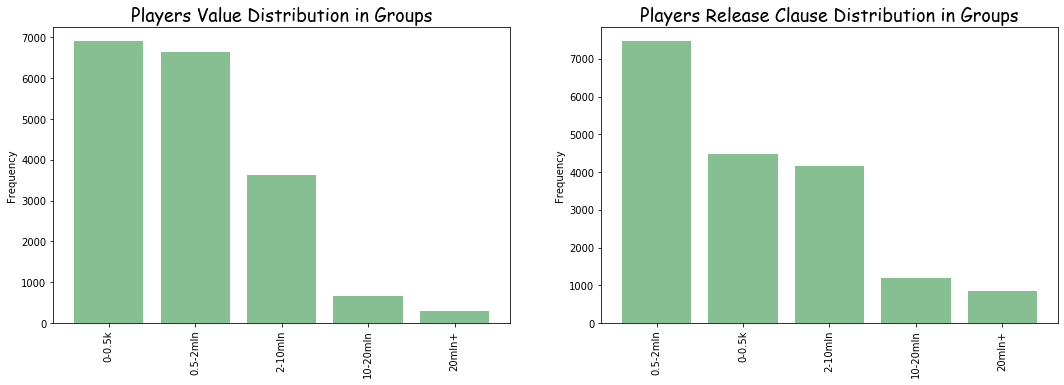

In [94]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

#BAR PLOT VISUALIZATION OF VALUE GROUPS
players_values = newbie3['Value Group'].value_counts().to_frame()
players_values.reset_index(level=0, inplace=True)
players_values.columns = ["Value Group", "Frequency"]


ax1.bar(players_values["Value Group"], players_values["Frequency"], color='#86bf91')
ax1.set_xticklabels(players_values["Value Group"], rotation=90)
ax1.set_ylabel("Frequency")
ax1.set_title('Players Value Distribution in Groups', fontname = 'Comic Sans MS', fontsize = 18)

#BAR PLOT VISUALIZATION OF RELEASE CLAUSE
players_release = newbie3['Release Clause Group'].value_counts().to_frame()
players_release.reset_index(level=0, inplace=True)
players_release.columns = ["Release Clause Group", "Frequency"]

ax2.bar(players_release["Release Clause Group"], players_release["Frequency"], color='#86bf91')
ax2.set_xticklabels(players_release["Release Clause Group"], rotation=90)
ax2.set_ylabel("Frequency")
ax2.set_title('Players Release Clause Distribution in Groups', fontname = 'Comic Sans MS', fontsize = 18)

In [96]:
newbie3[["Value","Release Clause"]].describe(include='all')

,Value,Release Clause
count,"18,159.00","18,159.00"
mean,"2,416,131.39","4,379,668.48"
std,"5,601,319.28","10,730,390.80"
min,0.00,0.00
25%,"300,000.00","505,000.00"
50%,"675,000.00","1,100,000.00"
75%,"2,000,000.00","3,300,000.00"
max,"118,500,000.00","228,100,000.00"


By looking at the table and the bar plots above we can conclude that there is some corelation between these two column. Both mean and std are twice more with release clause, the same goes with percentile ranks. Which is not surprising, usually in Fifa release clause is twice more than the actual value of the player, in some cases in might be less, but those are exceptions when the price of a player rises significantly throughout a short period of time without the contract being updated. 

0-1k     5114
1k-3k    4665
9k+      4337
3k-9k    4043
Name: Wage Group, dtype: int64

Text(0.5, 1.0, 'Players Wage Distribution in Groups')

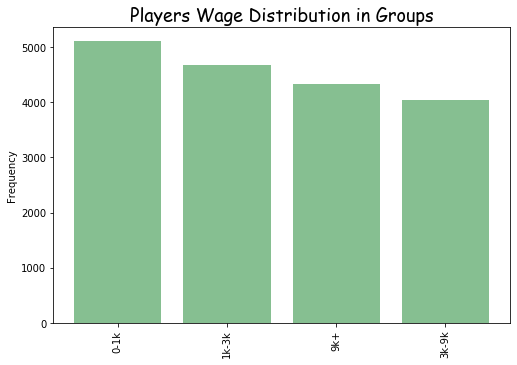

In [38]:
def detect_wage_group(Wage):
    if 0 <= Wage <= 1000:
        return '0-1k'
    elif 1000 < Wage <= 3000:
        return '1k-3k'
    elif 3000 < Wage <= 9000:
        return '3k-9k'
    elif 9000 < Wage:
        return '9k+'
    else:
        pass
    
newbie3['Wage Group'] = newbie3.apply(lambda x: detect_wage_group(x['Wage']), axis=1)
display(newbie3['Wage Group'].value_counts())

fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(2,2,1)

#BAR PLOT VISUALIZATION OF VALUE GROUPS
players_wages = newbie3['Wage Group'].value_counts().to_frame()
players_wages.reset_index(level=0, inplace=True)
players_wages.columns = ["Wage Group", "Frequency"]

ax1.bar(players_wages["Wage Group"], players_wages["Frequency"], color='#86bf91')
ax1.set_xticklabels(players_wages["Wage Group"], rotation=90)
ax1.set_ylabel("Frequency")
ax1.set_title('Players Wage Distribution in Groups', fontname = 'Comic Sans MS', fontsize = 18)

Here we can see that the majority of players are getting less than 9k per week, and about 20% getting more than that.

Interestingly enough about the half ot the players are getting less than 3k per week. 

### Height and Weight

The average height for a player is 181.26cm
The average weight for a player is 75.29kg


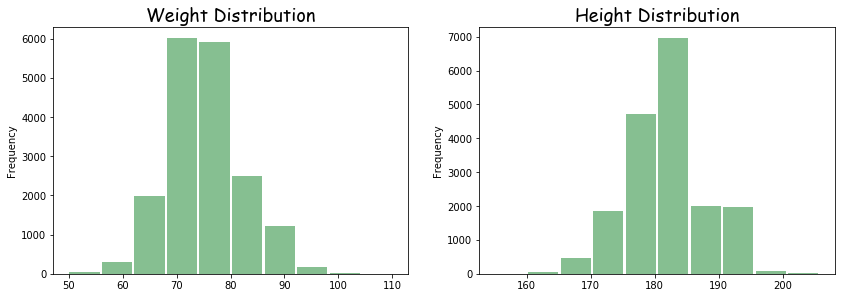

In [108]:
#now the visualization

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.hist(newbie3["Weight"], color='#86bf91', rwidth=0.93, bins=10)
ax1.set_ylabel('Frequency')
ax1.set_title ('Weight Distribution', fontname = 'Comic Sans MS', fontsize = 18)

ax2.hist(newbie3["Height"], color='#86bf91', rwidth=0.93, bins=10)
ax2.set_ylabel('Frequency')
ax2.set_title ('Height Distribution', fontname = 'Comic Sans MS', fontsize = 18)

print('The average height for a player is 181.26cm')
print('The average weight for a player is 75.29kg')

Both seem to be normal distributions with the majority of the values piled up in the middle. 
Mean is in the middle. Mean and median are almost equal. 

In [98]:
#CALCULATING THE PERCENTAGE OF PLAYERS THAT ARE SHORTER THAN 1.85
(newbie3[newbie3['Height']<185].shape[0])/len(newbie3)*100

66.77129797896359

In [110]:
#CALCULATING THE PERCENTAGE OF PLAYERS THAT LIGHTER THAN 75
(newbie3[newbie3['Weight']<75].shape[0])/len(newbie3)*100

54.07236081282009

In [102]:
def detect_position(Position):
    if Position == 'GK':
        return 'Goalkeeper'
    elif Position == 'CB' or Position == 'LB' or Position == "RB" or Position == "RWB" or Position == "LWB" or Position == "RCB" or Position == "LCB":
        return 'Defender'
    elif Position == 'CM' or Position == 'CAM' or Position == "CDM" or Position == "RM" or Position == "LM" or  Position == "LDM" or Position == "RDM" or Position == "LCM" or Position == "RCM" or Position == "LAM" or Position == "RAM":
        return 'Midfielder'
    elif Position == 'ST' or Position == 'LW' or Position == "RW" or Position == "LF" or Position == "RF" or Position == "CF" or Position == "LS" or Position == "RS":
        return 'Attacker'
    else:
        pass
    
newbie3['Position Category'] = newbie3.apply(lambda x: detect_position(x['Position']), axis=1)

With the groupby below we can detect plenty of stuff based on the category, to see the differences in wages, height and other attributes for different positions.

In [114]:
heights_by_position_category = newbie3.groupby("Position Category").agg({'Height':'mean'})
display(heights_by_position_category.head())

wages_by_position_category = newbie3.groupby("Position Category").agg({'Value':'sum'})
display(wages_by_position_category.head())

,Height
Position Category,
Attacker,180.88
Defender,182.65
Goalkeeper,188.19
Midfielder,178.21


,Value
Position Category,
Attacker,"10,199,845,000.00"
Defender,"11,586,160,000.00"
Goalkeeper,"3,211,275,000.00"
Midfielder,"18,877,250,000.00"


It seems we managed to cover all the main columns and do the initial overview and visualization for all of them.